In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

1. Загрузите данные в DataFrame с помощью функции read_csv библиотеки
pandas.


In [ ]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. Разделите данные на обучающую и тестовую выборки с помощью функции
train_test_split.

In [ ]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=294)

3. Постройте дерево решений с помощью класса
DecisionTreeClassifier с гиперпараметрами по умолчанию.

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

4. Отобразите дерево решений с глубиной 2. Опишите процесс принятия
решения.

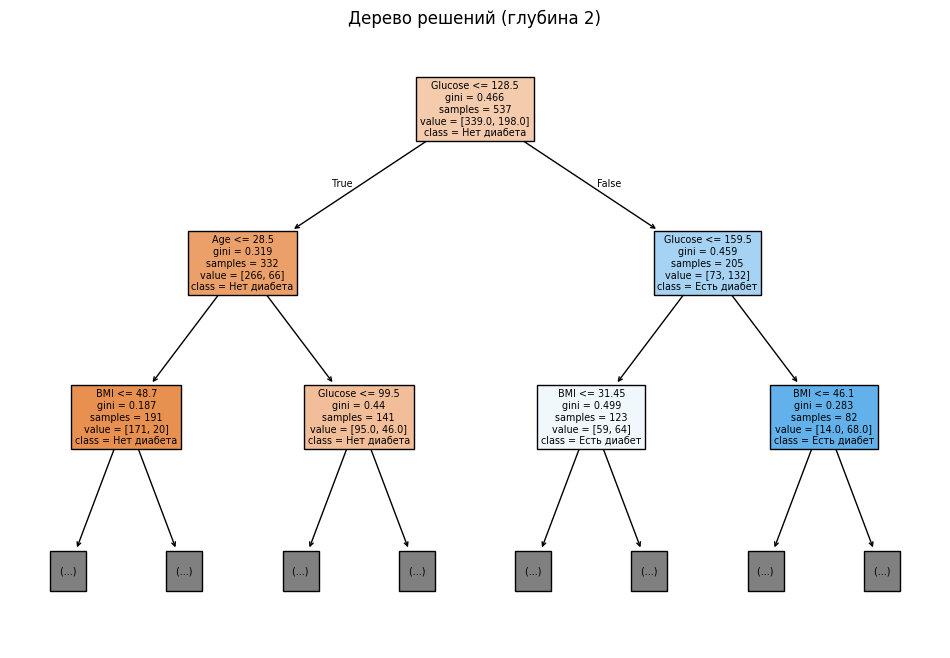

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(clf, max_depth=2, filled=True, feature_names=X.columns, class_names=['Нет диабета', 'Есть диабет'])
plt.title("Дерево решений (глубина 2)")
plt.show()

5. Получите информативность признаков. Какие признаки наиболее
значимые, какие - наименее?

Важность признаков:
                    Feature  Importance
1                   Glucose    0.351876
5                       BMI    0.175502
6  DiabetesPedigreeFunction    0.139964
7                       Age    0.088505
3             SkinThickness    0.069061
0               Pregnancies    0.064133
2             BloodPressure    0.056000
4                   Insulin    0.054958


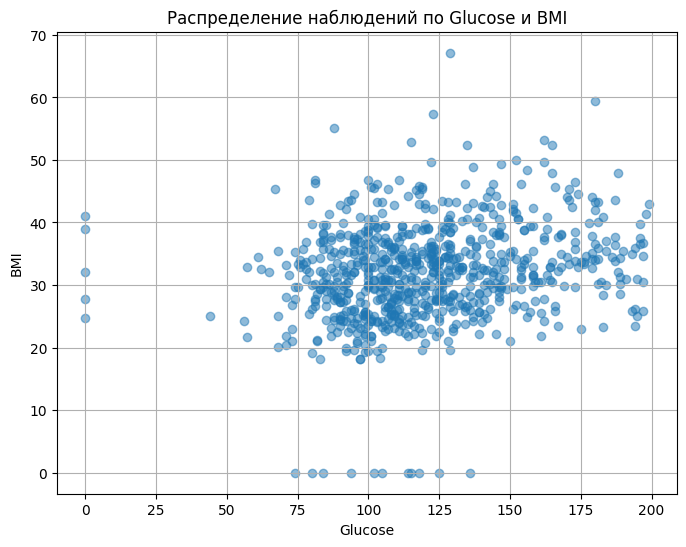

In [ ]:
importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Важность признаков:")
print(feature_importance_df)

# Создание scatter plot
plt.figure(figsize=(8, 6)) # Установка размера графика
plt.scatter(data['Glucose'], data['BMI'], alpha=0.5) # alpha регулирует прозрачность точек

# Добавление подписей к осям и заголовка
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Распределение наблюдений по Glucose и BMI')

# Отображение графика
plt.grid(True)
plt.show()

6. Оцените качество модели с помощью функции
classification_report.

In [ ]:
from sklearn.metrics import classification_report

y_pred_depth_2 = clf.predict(X_test)

class_report = classification_report(y_test, y_pred_depth_2, target_names=["No Diabetes", "Diabetes"])
print("\nОтчет о классификации для дерева решений с глубиной 2:")
print(class_report)


Отчет о классификации для дерева решений с глубиной 2:
              precision    recall  f1-score   support

 No Diabetes       0.80      0.82      0.81       161
    Diabetes       0.57      0.54      0.55        70

    accuracy                           0.74       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.73      0.74      0.73       231



7. Какая из моделей лучше подходит для диагностики диабета? Линейная
SVM-модель (из задания 14) или дерево решений?

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm_model = SVC(kernel='linear', random_state=294)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("\nОценка для модели SVM:")
print(f"Точность SVM: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm, target_names=["No Diabetes", "Diabetes"]))

tree_model = DecisionTreeClassifier(random_state=294)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print("\nОценка для модели дерева решений:")
print(f"Точность дерева решений: {accuracy_score(y_test, y_pred_tree):.4f}")
print(classification_report(y_test, y_pred_tree, target_names=["No Diabetes", "Diabetes"]))


Оценка для модели SVM:
Точность SVM: 0.7446
              precision    recall  f1-score   support

 No Diabetes       0.78      0.89      0.83       161
    Diabetes       0.62      0.41      0.50        70

    accuracy                           0.74       231
   macro avg       0.70      0.65      0.66       231
weighted avg       0.73      0.74      0.73       231


Оценка для модели дерева решений:
Точность дерева решений: 0.7229
              precision    recall  f1-score   support

 No Diabetes       0.79      0.82      0.80       161
    Diabetes       0.55      0.50      0.52        70

    accuracy                           0.72       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.72      0.72      0.72       231



Лучше подходит линейная SVM-модель

8. Подберите оптимальное значение гиперпараметра max_depth с помощью
поиска по сетке (класс GridSearchCV).

9. Обучите модель с оптимальным max_depth и оцените результат.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, 11)}

tree_model = DecisionTreeClassifier(random_state=294)

grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Оптимальное значение max_depth: {grid_search.best_params_['max_depth']}")

best_tree_model = grid_search.best_estimator_

y_pred_best_tree = best_tree_model.predict(X_test)
print("\nОценка модели с оптимальным max_depth:")
print(f"Точность модели с оптимальным max_depth: {accuracy_score(y_test, y_pred_best_tree):.4f}")
print(classification_report(y_test, y_pred_best_tree, target_names=["No Diabetes", "Diabetes"]))

Оптимальное значение max_depth: 3

Оценка модели с оптимальным max_depth:
Точность модели с оптимальным max_depth: 0.7619
              precision    recall  f1-score   support

 No Diabetes       0.78      0.91      0.84       161
    Diabetes       0.67      0.43      0.52        70

    accuracy                           0.76       231
   macro avg       0.73      0.67      0.68       231
weighted avg       0.75      0.76      0.74       231



10. Какая из моделей лучше всего решает поставленную задачу? Как Вы
думаете, если уравнять количество наблюдений по классам для обучения
модели, качество улучшится или нет?

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier

svm_model = SVC(kernel='linear', random_state=294)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("\nОценка для модели SVM:")
print(f"Точность SVM: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm, target_names=["No Diabetes", "Diabetes"]))

tree_model = DecisionTreeClassifier(random_state=294, max_depth=3)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print("\nОценка для модели дерева решений:")
print(f"Точность дерева решений: {accuracy_score(y_test, y_pred_tree):.4f}")
print(classification_report(y_test, y_pred_tree, target_names=["No Diabetes", "Diabetes"]))


Оценка для модели SVM:
Точность SVM: 0.7446
              precision    recall  f1-score   support

 No Diabetes       0.78      0.89      0.83       161
    Diabetes       0.62      0.41      0.50        70

    accuracy                           0.74       231
   macro avg       0.70      0.65      0.66       231
weighted avg       0.73      0.74      0.73       231


Оценка для модели дерева решений:
Точность дерева решений: 0.7619
              precision    recall  f1-score   support

 No Diabetes       0.78      0.91      0.84       161
    Diabetes       0.67      0.43      0.52        70

    accuracy                           0.76       231
   macro avg       0.73      0.67      0.68       231
weighted avg       0.75      0.76      0.74       231



Уравнивание признаков

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Инициализация RandomOverSampler
ros = RandomOverSampler(random_state=294)

# Применение RandomOverSampler
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Проверка количества наблюдений в каждом классе после oversampling
print("Распределение классов до oversampling:", Counter(y_train))
print("Распределение классов после oversampling:", Counter(y_resampled))

# Создание нового DataFrame с сбалансированными классами
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Outcome'])], axis=1)

Распределение классов до oversampling: Counter({0: 339, 1: 198})
Распределение классов после oversampling: Counter({1: 339, 0: 339})


Проверка точности моделей после уравнивания

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier

svm_model = SVC(kernel='linear', random_state=294)
svm_model.fit(X_resampled, y_resampled)

y_pred_svm = svm_model.predict(X_test)

print("\nОценка для модели SVM:")
print(f"Точность SVM: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm, target_names=["No Diabetes", "Diabetes"]))

tree_model = DecisionTreeClassifier(random_state=294, max_depth=3)
tree_model.fit(X_resampled, y_resampled)

y_pred_tree = tree_model.predict(X_test)

print("\nОценка для модели дерева решений:")
print(f"Точность дерева решений: {accuracy_score(y_test, y_pred_tree):.4f}")
print(classification_report(y_test, y_pred_tree, target_names=["No Diabetes", "Diabetes"]))


Оценка для модели SVM:
Точность SVM: 0.7446
              precision    recall  f1-score   support

 No Diabetes       0.83      0.80      0.81       161
    Diabetes       0.57      0.63      0.60        70

    accuracy                           0.74       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.75      0.74      0.75       231


Оценка для модели дерева решений:
Точность дерева решений: 0.7316
              precision    recall  f1-score   support

 No Diabetes       0.79      0.83      0.81       161
    Diabetes       0.56      0.50      0.53        70

    accuracy                           0.73       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.72      0.73      0.73       231



Качество модели ухудшилось на 0.03